# HW 1

Problem: 

The fraud data refers to information collected and analyzed to identify fraudulent activities, such as illegal financial transactions, embezzlement, identity theft, and other forms of deception. Our team will work on this data and will analyze the information to uncover patterns and anomalies that may indicate fraudulent behavior, and then develop strategies to prevent and mitigate these types of incidents. The problem that we team will be working on is to develop an effective method of detecting fraud and protecting against financial losses, while also ensuring that legitimate transactions are not impeded. This will involve machine learning algorithms, and other tools to identify high-risk activities, and then implementing appropriate measures to prevent fraud from occurring.


Source: https://www.kaggle.com/datasets/jainilcoder/online-payment-fraud-detection

Data Description

This is a dataset containing information about online payment fraud, so that we can understand what type of transactions lead to fraud.We collected a dataset from Kaggle, which contains historical information about fraudulent transactions which can be used to detect fraud in online payments. Below are all the columns from the dataset we’re using here:



step: represents a unit of time where 1 step equals 1 hour

type: type of online transaction

amount: the amount of the transaction

nameOrig: customer starting the transaction

oldbalanceOrg: balance before the transaction

newbalanceOrig: balance after the transaction

nameDest: recipient of the transaction

oldbalanceDest: initial balance of recipient before the transaction

newbalanceDest: the new balance of recipient after the transaction

isFraud: fraud transaction


# Teacher Note

your feature set seemed a little insufficient to me to do a business strategy. However, its not a big problem, the goal is the robust implementation of feature engineering, selection and model fit. Make sure you utilize imbalance dataset problems (u can check what other people use for this from the literature review). If you had some text data we could even apply a graph analysis for fraud. Please do a literature review for that as well

# HW 2

The team will pick 3 journal papers from (preferably) the top-ranked business journals, such as SMJ, Management Science, MISQ ISR, Marketing Science, and Academy of Management Journal (AMJ), about the selected topic and will discuss/compare the empirical validation methods used in these papers for hypothesis testing.

For example, if your team picks a topic about predicting market volatility and uses the Kaggle dataset to analyze this use case, they can review/compare the implementation on this paper that adopts a quantile regression approach on a similar use case. Google Scholar should be a great source to access these articles.

Another example could be as follows: Assume you picked a topic to analyze Employee Churn Prediction in a company. You can search for articles about churn prediction and analyze how different models were adopted to validate the empirical results and hypotheses proposed in those papers.

The goal of this stage is to explore the usage of the techniques learned in class for an academic article publication.

Please review the Final Project information and Final Project Guidelines before completing this assignment.

Submission: 3 pages of analysis (1 paper per page). Each page should include the problem covered in the paper, proposed models for solutions, and compare the implementation with your own project topic (similarities, relevance, adaptability of proposed model to your project).

# HW 3

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('onlinefraud.csv')

# 1. Getting familiar with the data

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


<AxesSubplot:>

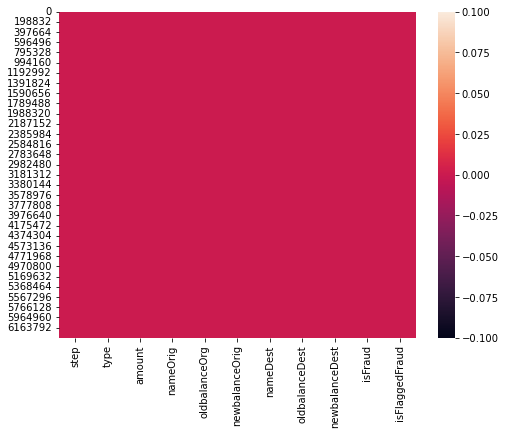

In [6]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull())

# 2. Exploratory Data Analysis

Text(0, 0.5, 'Count')

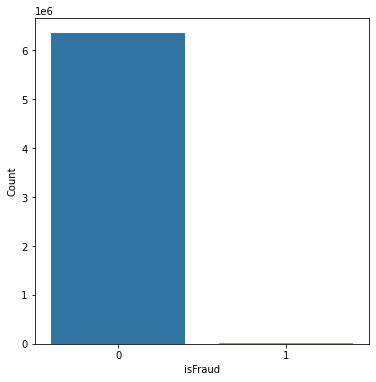

In [7]:
plt.figure(figsize=(6,6))
sns.countplot(df['isFraud'])
plt.xlabel('isFraud')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

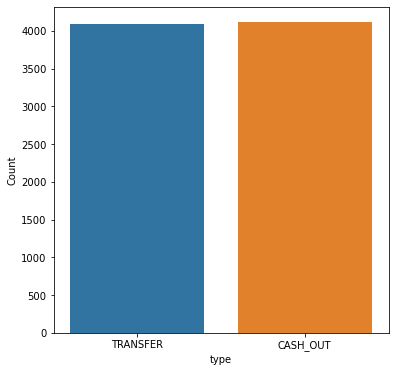

In [10]:
plt.figure(figsize=(6,6))
df_default = df[df['isFraud']==1]
sns.countplot(df_default['type'])
plt.xlabel('type')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

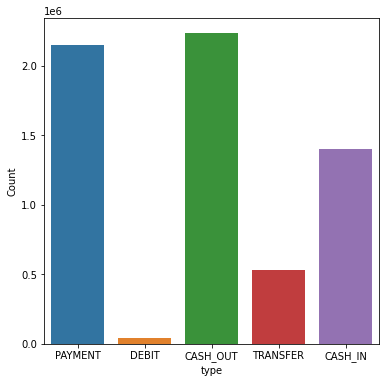

In [12]:
plt.figure(figsize=(6,6))
df_default = df[df['isFraud']==0]
sns.countplot(df_default['type'])
plt.xlabel('type')
plt.ylabel('Count')

In [8]:
df.groupby('type')['step'].count()

type
CASH_IN     1399284
CASH_OUT    2237500
DEBIT         41432
PAYMENT     2151495
TRANSFER     532909
Name: step, dtype: int64

Text(0, 0.5, 'Count')

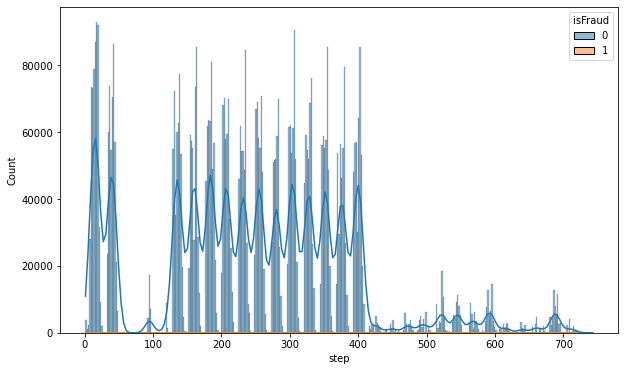

In [13]:
plt.figure(figsize=(10,6))
sns.histplot(data = df, x = "step", kde = True, hue = "isFraud")
plt.xlabel('step')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

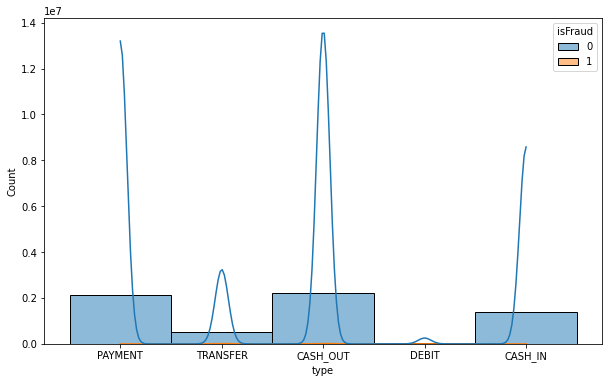

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(data = df, x = "type", kde = True, hue = "isFraud")
plt.xlabel('type')
plt.ylabel('Count')

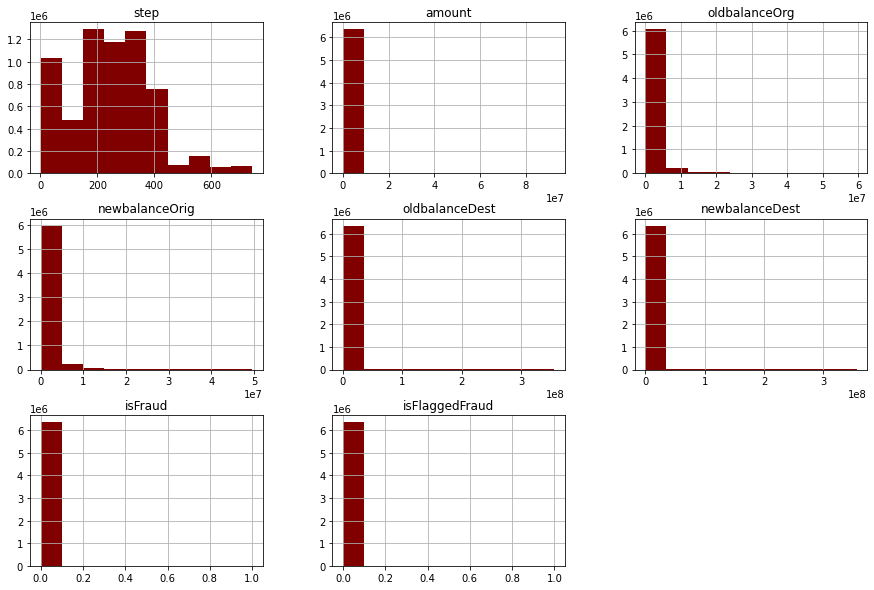

In [15]:
fig = plt.figure(figsize = (15, 10));
ax = fig.gca();
df.hist(ax = ax, color = 'maroon')
pass

In [16]:
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


In [19]:
abs(df.corr().iloc[:,7]).sort_values(ascending=False)

isFlaggedFraud    1.000000
isFraud           0.044109
amount            0.012295
oldbalanceOrg     0.003835
newbalanceOrig    0.003776
step              0.003277
newbalanceDest    0.000529
oldbalanceDest    0.000513
Name: isFlaggedFraud, dtype: float64

# 3. Splitting features and target variable

In [20]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [4]:
X = df.drop(columns=['isFraud'])

In [5]:
y = df['isFraud']

# 4. Get dummies

In [6]:
X = pd.get_dummies(X, columns=['type'], drop_first=True)

In [9]:
X['nameOrig'] = X['nameOrig'].str[1:]
X['nameDest'] = X['nameDest'].str[1:]

In [11]:
X.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,1231006815,170136.0,160296.36,1979787155,0.0,0.0,0,0,0,1,0
1,1,1864.28,1666544295,21249.0,19384.72,2044282225,0.0,0.0,0,0,0,1,0
2,1,181.00,1305486145,181.0,0.00,553264065,0.0,0.0,0,0,0,0,1
3,1,181.00,840083671,181.0,0.00,38997010,21182.0,0.0,0,1,0,0,0
4,1,11668.14,2048537720,41554.0,29885.86,1230701703,0.0,0.0,0,0,0,1,0


# 5. Split into train test set

In [7]:
from sklearn.model_selection import train_test_split

In [12]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
x_res, y_res=sm.fit_resample(X,y)

In [29]:
y_res.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

In [13]:
#split balanced datasets
xb_train,xb_test,yb_train,yb_test=train_test_split(x_res,y_res,test_size=0.2,random_state=42)

# 6. Feature Standardization

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
#scale balanced data
scaler_b=StandardScaler()
scaler_b.fit(xb_train)
xb_train_scaled=scaler_b.transform(xb_train)
xb_test_scaled=scaler_b.transform(xb_test)

# 7. Modeling

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn import svm

Logistic Regression

In [21]:
lr_b = LogisticRegression(random_state=42)
lr_b.fit(xb_train_scaled, yb_train)
y_pred_lr_b = lr_b.predict(xb_test_scaled)

In [25]:
print("\nConfusion Matrix for Logistic Regression Model with balanced dataset:\n\n", confusion_matrix(yb_test, y_pred_lr_b))
print("\nClassification Report for Logistic Regression Model with balanced dataset:\n\n", classification_report(yb_test, y_pred_lr_b))


Confusion Matrix for Logistic Regression Model with balanced dataset:

 [[1240608   30229]
 [  47046 1223880]]

Classification Report for Logistic Regression Model with balanced dataset:

               precision    recall  f1-score   support

           0       0.96      0.98      0.97   1270837
           1       0.98      0.96      0.97   1270926

    accuracy                           0.97   2541763
   macro avg       0.97      0.97      0.97   2541763
weighted avg       0.97      0.97      0.97   2541763



Random Forest

In [43]:
rf_b = RandomForestClassifier(random_state=42, max_depth=10)
rf_b.fit(xb_train, yb_train)
#y_pred_rf_b= rf_b.predict(xb_test)
y_pred_rf_b=rf_b.predict(xb_test)

In [44]:
print("\nConfusion Matrix for Random Forest Model with balanced dataset:\n\n", confusion_matrix(yb_test, y_pred_rf_b))
print("\nClassification Report for Random Forest Model with balanced dataset:\n\n", classification_report(yb_test, y_pred_rf_b))


Confusion Matrix for Random Forest Model with balanced dataset:

 [[1257959   12878]
 [   8592 1262334]]

Classification Report for Random Forest Model with balanced dataset:

               precision    recall  f1-score   support

           0       0.99      0.99      0.99   1270837
           1       0.99      0.99      0.99   1270926

    accuracy                           0.99   2541763
   macro avg       0.99      0.99      0.99   2541763
weighted avg       0.99      0.99      0.99   2541763



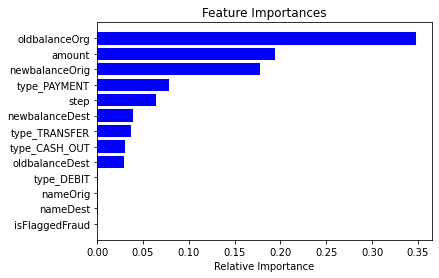

In [45]:
features = X.columns
importances_b = rf_b.feature_importances_
indices = np.argsort(importances_b)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances_b[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

K Nearest Neighbors

In [46]:
knn_b=KNeighborsClassifier(3)
knn_b.fit(xb_train,yb_train)

KNeighborsClassifier(n_neighbors=3)

In [48]:
knn_b_hat=knn_b.predict(xb_test)

In [49]:
print("\nConfusion Matrix for KNN Model with balanced dataset:\n\n", confusion_matrix(yb_test.values,knn_b_hat))
print("\nClassification Report for KNN Model with balanced dataset:\n\n",classification_report(yb_test.values,knn_b_hat))


Confusion Matrix for KNN Model with balanced dataset:

 [[1196676   74161]
 [   1197 1269729]]

Classification Report for KNN Model with balanced dataset:

               precision    recall  f1-score   support

           0       1.00      0.94      0.97   1270837
           1       0.94      1.00      0.97   1270926

    accuracy                           0.97   2541763
   macro avg       0.97      0.97      0.97   2541763
weighted avg       0.97      0.97      0.97   2541763

